# Lab 01: Data pre-processing

- Student ID: 21127229
- Student name: Dương Trường Bình

## Instructions

### How to do your homework

To finish the project, fill in:
- ```YOUR CODE HERE``` in code cells

- ```YOUR ANSWER HERE``` in text cells.

**NOTE:**

- Your project must be finished by your own self. You may discuss with the others, but must not copy (partially or entirely) their codes or solutions. You will receive a <font color='red'>0 point</font> for this project if you violate this plagiarism rule. 
- Because our plagiarism checker is very sensitive, if the plagiarism check result is <font color='red'>greater than 60%</font>, your work will receive <font color='red'>0 point</font>. Therefore we will not deal with plagiarism cases.

- You can create new cells to clarify your code / answer, however, please <font color='red'>do not delete any pre-defined code cells or test case cells</font> as it may affect the grading results.

### How to submit

In the grading stage, I will first select `Kernel` - `Restart Kernel & Run All Cells` to restart and run all cells in your notebook. As a result, before submitting your project, you should run `Kernel` - `Restart Kernel & Run All Cells` to ensure your code will run as you expect.

After that, rename your notebook as `ID1.ipynb` (e.g. `19123.ipynb`) and submit on Moodle.

<font color=yellow>Please follow the above submission guidelines. Any violation of these instructions may cost you some penalty points (0-50%)!!!</font>


### Contents

- Data pre-processing techniques.
    - Exploring your data (2 pts)
    - Encoding categorical (2 pts)
    - Discretization techniques (2 pts)
    - Outlier handling techniques (1 pts)
    - Feature scaling techniques (2 pts)
    - Clean submission (1 pts)

## Import libs
**Note:** <span style="color:yellow">All packages you can use in this lab are imported in the cell below. Please don't modify this, just run that.</span>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import json
from zlib import adler32

from typing import List, Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer, RobustScaler

In [3]:
# Config matplotlib and pandas display
%matplotlib inline
pd.set_option('display.max_colwidth', 100) # For clearly
pd.set_option('display.max_columns', None) # For clearly

In [4]:
# Config seaborn
plt.rcParams["figure.figsize"] = [12, 8]

custom = {"axes.edgecolor": "blue", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("whitegrid", rc = custom)

In [5]:
# Checking Python virtual env
sys.executable

'c:\\Users\\HP\\anaconda3\\envs\\dm-env\\python.exe'

## Exploring your data (2 pts)

### Read rawdata from file

In [6]:
# YOUR CODE HERE
raw_df = pd.read_csv('data/spaceX_laucnh.csv')

In [7]:
# TEST
raw_df.head()

,uct_time,launch_name,payloads,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,2006-03-24T22:30:00.000Z,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
1,2007-03-21T01:10:00.000Z,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
2,2008-08-03T03:34:00.000Z,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
3,2008-09-28T23:15:00.000Z,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success
4,2009-07-13T03:35:00.000Z,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success


### How many rows and how many columns does the raw data have?

Next, you calculate the number of rows and columns of the DataFrame `raw_df` and store it in the variable `shape` (tuple).

In [8]:
# YOUR CODE HERE
shape = raw_df.shape

In [9]:
# TEST
assert adler32(str(np.sqrt(shape[0] * shape[1])).encode()) == 590480314

### What does each line mean? Does it matter if the lines have different meanings?

**TODO**: 

- Each line the raw dataset represents a record information of launch and landing of spaceX rocket from 2006 to 2022.

- If the lines in the dataset have different meanings, it can significantly hinder data analysis and prediction tasks. Inconsistent or varied meanings for the lines make it challenging to compare and draw meaningful insights from the data. Consistency in the interpretation of each line is crucial for accurate analysis and reliable conclusions.

### Does the raw data have duplicate rows?

Next, you calculate the number of rows with duplicate indexes and store it in the variable `num_duplicated_rows`. In a group of lines with the same index, the first line is not counted as repeated.

In [10]:
# YOUR CODE HERE
# raise NotImplementedError()
num_duplicated_rows = raw_df.duplicated().sum()

In [11]:
# TEST
assert adler32(str(num_duplicated_rows).encode()) == 3211313

### What does each column mean?

To see the meaning of each column:
- First, you need to read the file "metadata.json" in the `data` folder into DataFrame `metadata`;
- Then, you describe what suitable datatype for each column? 

In [12]:
# YOUR CODE HERE
metadata = pd.read_json('data/metadata.json')

In [13]:
# TEST
metadata

,title,description,source,certificate_link,certificate,attributions
landpad,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The landpad information.
landpad_geo,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The geo location of the landing pad.
landpad_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The name of the landing pad.
landpad_region,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The region of the landing pad.
landpad_type,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The type of the landing pad.
launch_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,Launch name. Typically the name of the space mission.
launchpad_geo,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The geo location of the launchpad.
launchpad_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The name of the launchpad.
launchpad_region,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The region of the launchpad.
outcome,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,Boolean indicating launch success or failure.


**TODO: Describe datatype**

| Column            | Suitable Data Type            |
|-------------------|-------------------------------|
| uct_time          | Datetime (UTC)               |
| launch_name       | String                        |
| payloads          | List                          |
| rocket_name       | String                        |
| rocket_boosters   | Integer                       |
| rocket_height     | Float                         |
| rocket_diameter   | Float                         |
| rocket_mass       | Float                         |
| launchpad_name    | String                        |
| launchpad_region  | String                        |
| launchpad_geo     | Tuple of Floats (Latitude, Longitude) |
| landpad           | String                        |
| landpad_name      | String                        |
| landpad_type      | String                        |
| landpad_region    | String                        |
| landpad_geo       | Tuple of Floats (Latitude, Longitude) |
| outcome           | Boolean                       |


Before moving forward, you should read the results displayed above and make sure you understand the meaning of the columns. To understand the meaning of the column, you may need to look at the values of the DataFrame side column `raw_df`.

### What data type does each column currently have? Are there any columns whose data types are not suitable for further processing?

Next, you calculate the data type (dtype) of each column in DataFrame `raw_df` and save the result into Series `dtypes` (This Series has the index as the column name).

In [14]:
# YOUR CODE HERE
dtypes = raw_df.dtypes

In [15]:
# TEST
int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
assert adler32(str(len(int_cols)).encode()) == 3276850

float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
assert adler32(str(len(float_cols)).encode()) == 3473461

object_cols = set(dtypes[dtypes == object].index)
assert adler32(str(len(object_cols)).encode()) == 9830500

#### Convert datatype for UCT times attribute

The datatype of the column `uct_time` should be datetime. You have to convert it to the right datatype. 

In [16]:
# YOUR CODE HERE
# raise NotImplementedError()
raw_df['uct_time']= pd.to_datetime(raw_df['uct_time'])

In [17]:
# TEST
raw_df["uct_time"].dtype

datetime64[ns, UTC]

For the remain columns, we will process later. :)

### Exploring datetime attributes

In [18]:
datetime_col_df = raw_df.select_dtypes(include=['datetime64','datetime64[ns, UTC]'])
datetime_col_df.head()

,uct_time
0,2006-03-24 22:30:00+00:00
1,2007-03-21 01:10:00+00:00
2,2008-08-03 03:34:00+00:00
3,2008-09-28 23:15:00+00:00
4,2009-07-13 03:35:00+00:00


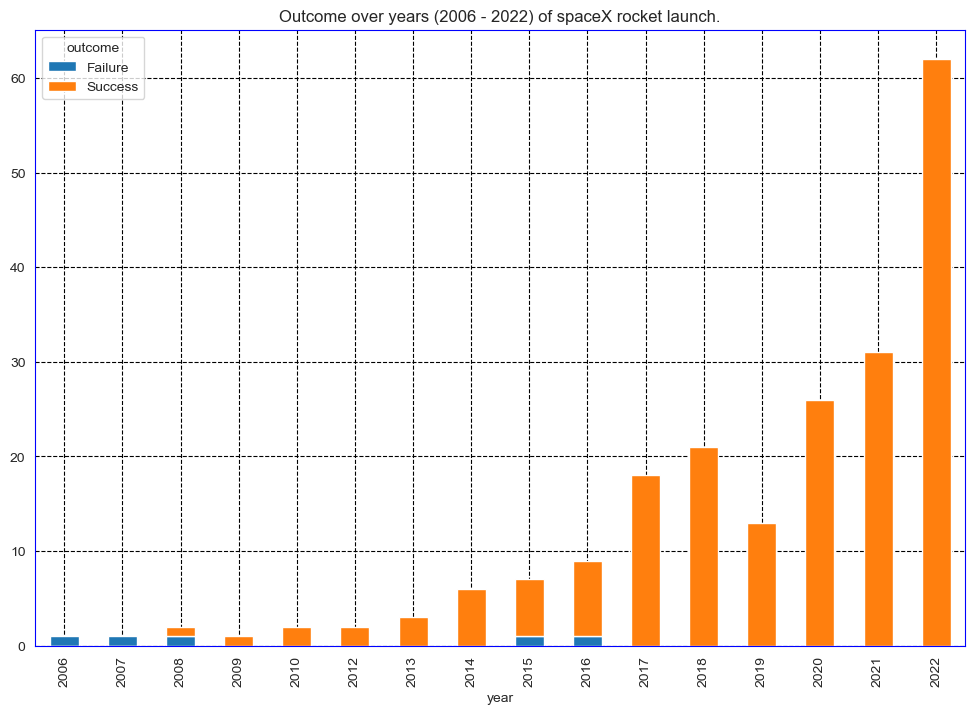

In [19]:
# Visualization
df_plot = raw_df.copy()
df_plot["year"] = raw_df['uct_time'].dt.year
df_plot = df_plot.groupby(['outcome', 'year']).size().reset_index().pivot(columns='outcome', index='year', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title("Outcome over years (2006 - 2022) of spaceX rocket launch.")
plt.show()

**TODO: Describe your observation from chart**

- The graph illustrates the outcomes of SpaceX rocket launches and landings from 2006 to 2022. The x-axis denotes the years, while the y-axis represents the number of launches and landings. The color of the bars distinguishes between success (orange) and failure (blue) outcomes.

- First of all, we can see that the number of launches and landings has gradually increased from 2006 to 2022 (except for 2019 which was a little bit lower than 2018).
    - In the first period from 2006 to 2013, there were only a few rockets launches each year, but in the period after 2013 to 2022, the number of rockets launches increased quite rapidly, especially from 2016 onwards, the number of rockets launches increased sharply. (In 2017, there were more than 20 rocket launches, double that of 2016).
    
    - The highest is 2022 with more than 60 rockets launches.

- Overall, we can see that the orange color accounts for almost all, meaning that most rockets launches are successful, with only a few failures (blue).
    - In the first 2 years 2006-2007, 2 rocket launches failed. In 2008, there was the first successful rocket launch besides a failed one.

    - And since then, almost all rocket launches have been successful until 2022 (except for two failures in 2015 and 2016). It can be seen that spaceX has learned from failures and improved a lot to achieve such a high success rate in recent years.


### Exploring numerical attributes

In [20]:
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
0,0,22.25,1.68,30146.0,NaN
1,0,22.25,1.68,30146.0,NaN
2,0,22.25,1.68,NaN,NaN
3,0,22.25,1.68,NaN,NaN
4,0,22.25,1.68,30146.0,NaN


For columns with numeric data types, you will calculate:
- Percentage (from 0 to 100) of missing values
- Min value
- Lower quantile
- Median value
- Upper quantile
- Max value

You will save the results to a DataFrame `num_col_info_df`, where:
- The names of the columns are the names of the numeric columns in `raw_df`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [21]:
def missing_ratio(s):
    # TODO:
    result = s.isna().mean() * 100
    return result.round(1)

def median(df):
    # TODO:
    return np.round(df.median(), 1)

def lower_quartile(df):
    # TODO:
    return np.round(df.quantile(0.25), 1)

def upper_quartile(df):
    # TODO:
    return np.round(df.quantile(0.75), 1)

In [22]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
missing_ratio,0.0,29.80,29.80,29.8,100.0
min,0.0,22.25,1.68,30146.0,NaN
lower_quartile,0.0,70.00,3.70,549054.0,NaN
median,0.0,70.00,3.70,549054.0,NaN
upper_quartile,0.0,70.00,3.70,549054.0,NaN
max,2.0,70.00,12.20,1420788.0,NaN


If an attribute has missing ratio greater than 70%, you can consider to drop it from dataframe.

In [23]:
# YOUR CODE HERE
num_col_df.drop(columns = num_col_info_df.T[num_col_info_df.T["missing_ratio"] > 70].index, inplace = True)
raw_df.drop(columns = num_col_info_df.T[num_col_info_df.T["missing_ratio"] > 70].index, inplace = True)

In [24]:
# TEST
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
0,0,22.25,1.68,30146.0
1,0,22.25,1.68,30146.0
2,0,22.25,1.68,NaN
3,0,22.25,1.68,NaN
4,0,22.25,1.68,30146.0


In the otherwise case, you have to fill missing values. To deal with missing values, you have to perform mean fill, median fill, and mode fill. Then, you study how different they are by using the visualization of probability density function (p.d.f).

In [25]:
# YOUR CODE HERE
## Mean fill
num_col_df['mean_fill_rocket_height'] = num_col_df['rocket_height'].fillna(num_col_df['rocket_height'].mean())

In [26]:
# YOUR CODE HERE
## Median fill
num_col_df['median_fill_rocket_height'] = num_col_df['rocket_height'].fillna(num_col_df['rocket_height'].median())

In [27]:
# YOUR CODE HERE
## Mode fill
num_col_df['mode_fill_rocket_height'] = num_col_df['rocket_height'].fillna(num_col_df['rocket_height'].mode()[0])

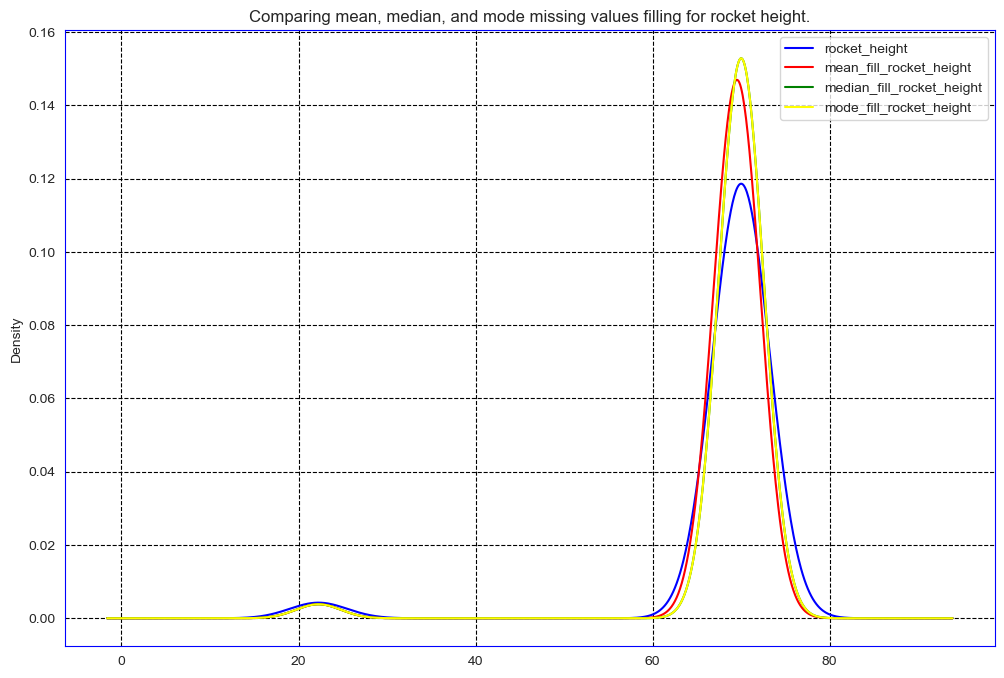

In [28]:
# Visualization for rocket_height
fig = plt.figure()
ax = fig.add_subplot(111)

num_col_df["rocket_height"] .plot(kind="kde", ax=ax, color="blue")
num_col_df["mean_fill_rocket_height"] .plot(kind="kde", ax=ax, color="red")
num_col_df["median_fill_rocket_height"] .plot(kind="kde", ax=ax, color="green")
num_col_df["mode_fill_rocket_height"] .plot(kind="kde", ax=ax, color="yellow")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title("Comparing mean, median, and mode missing values filling for rocket height.")
plt.show()

**TODO: Describe your observation from chart**

- The graph illustrates the probability density function (p.d.f) of the rocket height attribute. The x-axis denotes the rocket height, while the y-axis represents the probability density function (p.d.f). The color of the bars distinguishes between mean fill (red), median fill (green), mode fill (yellow) and original data (blue).

- Overall, we can see that the difference of shape of four p.d.f is not significant. The p.d.f of the original data and the p.d.f of the mean fill, median fill, and mode fill closely resemble a bell-shaped distribution, with the majority concentrating in the range of values 60-80, and a smaller portion in the range of values 20.

- Upon closer inspection, it becomes apparent that the p.d.f of mean fill, median fill, and mode fill tends to be higher than the p.d.f of the original data in the range of values 60-80. Additionally, the p.d.f of median fill and mode fill are nearly identical, indicating that the median and mode values of rocket height are close to each other.


**Before choosing one of them to fill in your `raw_df`**, do you realize an abnomal in `rocket_height` attribute?

**TODO:** Read metadata again, check `rocket_name`, find the way to fill missing value for `rocket_height`.

In [29]:
# YOUR CODE HERE
## Recheck: find unique elements in `rocket_name`
raw_df["rocket_name"].unique()

## Check the maximum and minimum height values for each rocket
def checking_range(rocket_name: str) -> tuple[float, float]:
    """Checking range of height for a given rocket name

    Args:
        rocket_name (str): the name of rocket

    Returns:
        tuple[float, float]: the range, min-max.
    """
    min_height = raw_df[raw_df["rocket_name"] == rocket_name]["rocket_height"].min()
    max_height = raw_df[raw_df["rocket_name"] == rocket_name]["rocket_height"].max()
    return (min_height, max_height)

In [30]:
print('Unique rocket names and their height range:')
for rocket_name in raw_df["rocket_name"].unique():
    min_height, max_height = checking_range(rocket_name)
    print(f"{rocket_name}: {min_height} - {max_height}")

Unique rocket names and their height range:
Falcon 1: 22.25 - 22.25
Falcon 9: 70.0 - 70.0
Falcon Heavy: 70.0 - 70.0


We see that all 3 rockets have the same min and max height, which means the height of the rocket is a fixed value, so we can fill the missing value of rocket_height by taking the min or max height of that rocket based on the rocket_name.

In [31]:
# Perform checking for Falcon 1
assert adler32(str(checking_range(rocket_name="Falcon 1")[0] + checking_range(rocket_name="Falcon 1")[1]).encode()) == 33620172

In [32]:
# Perform checking for Falcon 9
assert adler32(str(checking_range(rocket_name="Falcon 9")[0] + checking_range(rocket_name="Falcon 9")[1]).encode()) == 48627956

In [33]:
# Perform checking for Falcon Heavy
assert adler32(str(checking_range(rocket_name="Falcon Heavy")[0] * checking_range(rocket_name="Falcon Heavy")[1]).encode()) == 70713644

And now, you should fill missing values with a specific value. 

In [34]:
# TODO:
# YOUR CODE HERE
def fill_rocketheight(df: pd.DataFrame) -> pd.DataFrame:
    cp_df = df.copy()
    # Group by rocket_name
    groupby_rocket_name = cp_df.groupby("rocket_name")
    
    # Fill missing values with minimum value of each group
    for name, group in groupby_rocket_name:
        group["rocket_height"].fillna(group["rocket_height"].min(), inplace=True)
        cp_df.loc[group.index] = group    
    return cp_df

raw_df = fill_rocketheight(raw_df)

Choose one of ways (mean fill, median fill) to fill missing values for the remain columns (`rocket_diameter`, and `rocket_mass`)

In [35]:
# YOUR CODE HERE
# Median fill for `rocket_diameter` and `rocket_mass`
raw_df["rocket_diameter"].fillna(raw_df["rocket_diameter"].mean(), inplace=True)
raw_df["rocket_mass"].fillna(raw_df["rocket_mass"].mean(), inplace=True)

In [36]:
# TEST
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
missing_ratio,0.0,0.00,0.00,0.0
min,0.0,22.25,1.68,30146.0
lower_quartile,0.0,70.00,3.70,549054.0
median,0.0,70.00,3.70,549054.0
upper_quartile,0.0,70.00,3.80,556404.5
max,2.0,70.00,12.20,1420788.0


In [37]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
assert num_col_info_df.shape == (6, 4)

data = num_col_info_df.loc[['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max'],
                        ['rocket_boosters', 'rocket_height', 'rocket_diameter', 'rocket_mass']].values

assert adler32(str(data).encode()) == 1580417893

**TODO** What type of each numerical attribute? Continous?  variable?

Type of each numerical attribute:

| Attribute            | Type            |
|-------------------|-----------------|
| rocket_boosters   | Discrete        |
| rocket_height     | Continous       |
| rocket_diameter   | Continous       |
| rocket_mass       | Continous       |



### Exploring non-numerical attributes

In [38]:
cate_col_df = raw_df.select_dtypes(include=['object'])
cate_col_df.head()

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
1,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
2,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
3,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success
4,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success


In [39]:
def str2dict(s: str) -> List[Dict]:
    """Convert given string to dict
    
    Example:
        - Input string: [{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]
        - Output: ({'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'})


    Args:
        s (str): _description_
        
    Return:
        list(dict):
    """
    # TODO:
    # YOUR CODE HERE 
    return eval(s)

Series and DataFrame methods define a .explode() method that explodes lists into separate rows. You should use this method to explode the `payloads` attribute and convert this column to `str`

In [40]:
# TODO:
# YOUR CODE HERE
cate_col_df['payloads'] = cate_col_df['payloads'].agg([str2dict])
cate_col_df = cate_col_df.explode('payloads')

For columns with non-numeric data types, you calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. Directly counting the number of values in these columns doesn't make much sense, so it's better to count the number of elements of all types.
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): you use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

You will save the results to DataFrame `cat_col_info_df`, where:
- The names of the columns are the names of the non-numeric columns in `raw_df`
- The names of the lines are: "missing_ratio", "num_values", "value_ratios"

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [41]:
def missing_ratio(s):
    # TODO:
    # YOUR CODE HERE
    result = s.isna().mean() * 100
    return result.round(1)

def num_values(s):
    # TODO:
    # YOUR CODE HERE
    return s.nunique(dropna=True)

def value_ratios(s):
    # TODO:
    # YOUR CODE HERE
    result = s.value_counts(normalize=True, dropna=True, ascending=False) * 100
    result = result.round(1).to_dict()
    return result

cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,1.4,0.0,0.0,0.0,0.0,27.3,23.9,47.4,0.0,0.0
num_values,205,NaN,3,4,3,4,6,3,2,5,2
value_ratios,"{'Trailblazer': 1.0, 'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.0, 'COTS 1': 1.0, 'CRS-...",NaN,"{'Falcon 9': 94.7, 'Falcon 1': 2.9, 'Falcon Heavy': 2.4}","{'CCSFS SLC 40': 55.0, 'KSC LC 39A': 27.8, 'VAFB SLC 4E': 14.4, 'Kwajalein Atoll': 2.9}","{'Florida': 82.8, 'California': 14.4, 'Marshall Islands': 2.9}","{'(28.5618571, -80.577366)': 55.0, '(28.6080585, -80.6039558)': 27.8, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 80.5, 'RTLS': 15.1, 'Ocean': 4.4}","{'Florida': 53.6, 'California': 46.4}","{'(33.7291858, -118.262015)': 40.7, '(nan, nan)': 27.3, '(28.4104, -80.6188)': 20.6, '(28.485833...","{'Success': 97.1, 'Failure': 2.9}"


In [42]:
# TEST
c = cat_col_info_df['landpad_name']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33554635
assert adler32(str(c.loc['num_values']).encode()) == 3604535

c = cat_col_info_df['landpad_type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33161421
assert adler32(str(c.loc['num_values']).encode()) == 3407924
    
c = cat_col_info_df['landpad_region']
assert adler32(str(c.loc['missing_ratio']).encode()) == 34144462
assert adler32(str(c.loc['num_values']).encode()) == 3342387

And now, we will fill in the missing value for these non-attributes. You make a list of attributes that need to be filled in here.
- `landpad_name`
- `landpad_type`
- `landpad_region`

Considering the missing ratio, should we delete these attribute columns?

The missing ratio of these attributes is not too high (less than 50%) so we should not delete these attribute columns. Instead, we should try to fill in the missing values for these attributes to retain as much information as possible and if we can't fill in the missing values, we can consider deleting these attribute columns.

Next, you have to check `landpad_name`, `landpad_type`, and `landpad_region`. If these values are ALL NAN, you should these row from your `cate_col_df`.

In [43]:
# TODO:
# YOUR CODE HERE
cate_col_df.dropna(subset=['landpad_name', 'landpad_type', 'landpad_region'], thresh=2, inplace=True)
cate_col_df.reset_index(drop=True, inplace=True)

In [44]:
# TEST
cate_col_df[cate_col_df["landpad_name"].isnull() & cate_col_df["landpad_type"].isnull() & cate_col_df["landpad_region"].isnull()]

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome


In [45]:
# TEST
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.6,0.0,0.0
num_values,151,NaN,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...",NaN,"{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.6, 'California': 46.4}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


**Question** Considering the Falcon 1 rockets, what are the names, types, and regions of their landpad? Comparing their names of launch pad and launch region. Similarly, you check for Falcon 9 and Falcon Heavy rockets, give your observation, and fill in the missing value with some specific values.

*Hint*: It can be said that the region of the landing pad and launch pad are the same.

By Googling, you can find something interesting about the region of each landpad. Please fill the table below:

TODO: Complete the table below.

| Landpad  | Type  |  Region |
|---|---|---|
| OCISLY  | ASDS  | Port of Los Angeles, California  |
| JRTI  | ASDS  | Florida  |
| ASOG  | ASDS  |  Port Canaveral, Florida  |
| LZ-1  |  RTLS | Florida |
| LZ-4  | RTLS  | California  |
| JRTI-1  | ASDS  | Florida  |

**Observation 1**: 
- Falcon 9 rockets which have launchpad in Florida and have landpad in Florida that have no missing values. 
- Falcon 9 rockets which have launchpad in Florida and have landpad in California that have no missing values. Their land name and type are OCISLY and ASDS, respectively.

TODO: What are the further rules you can find?

- Falcon 9 rockets which have launchpad in California that have outcomes are all successful
- Falcon 9 rockets which have laundpad in Florida that have outcomes are all successful
- Falcon Heavy rockets all have outcomes are all successful and have launchpad in Florida.
- Falcon 1 all have launchpad region in Marshall Islands and have missing values in `landpad_name`, `landpad_type`, `landpad_region` and `landpad_geo`

**Observation 2**
- Falcon 9 rockets which have landpad name is `OCISLY`, and landpad type is `ASDS` => landpad region `California`
- Falcon 9 rockets which have landpad name is `JRTI`, and landpad type is `ASDS` => landpad region `Florida`
- Falcon 9 rockets which have landpad name is `ASOG`, and landpad type is `ASDS` => landpad region `Florida`

TODO: What are the further rules you can find?

- Falcon Heavy rockets which have landpad name is `OCISLY`, and landpad type is `ASDS` => landpad region `California`

In [46]:
def fill_landpadregion(df: pd.DataFrame) -> pd.DataFrame:
    """Fill missing value in landpad region in the input dataframe.

    Args:
        df (pd.DataFrame): input dataframe

    Returns:
        pd.DataFrame: output dataframe
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    if (df is None):
        raise ValueError
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()
    missing_rows = df_cp[df_cp['landpad_region'].isnull()]

    # Fill missing values in `landpad_region` based on `landpad_name`
    for idx, row in missing_rows.iterrows():
        if row['landpad_name'] == 'OCISLY':
            df_cp.at[idx, 'landpad_region'] = 'California'
        elif row['landpad_name'] == 'JRTI':
            df_cp.at[idx, 'landpad_region'] = 'Florida'
        elif row['landpad_name'] == 'ASOG':
            df_cp.at[idx, 'landpad_region'] = 'Florida'
        elif row['landpad_name'] == 'LZ-1':
            df_cp.at[idx, 'landpad_region'] = 'Florida'
        elif row['landpad_name'] == 'LZ-4':
            df_cp.at[idx, 'landpad_region'] = 'California'
        elif row['landpad_name'] == 'JRTI-1':
            df_cp.at[idx, 'landpad_region'] = 'Florida'
            
    
    return df_cp

cate_col_df = fill_landpadregion(cate_col_df)

In [47]:
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,NaN,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...",NaN,"{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.9, 'California': 46.1}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


In [48]:
# TEST
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df['landpad_name']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3604535
assert adler32(str(c.loc['value_ratios']['LZ-1']).encode()) == 32440521

c = cat_col_info_df['landpad_type']
assert adler32(str(c.loc['missing_ratio']).encode())  == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3342387
assert adler32(str(c.loc['value_ratios']['RTLS']).encode()) == 33226957

c = cat_col_info_df['landpad_region']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3342387
assert adler32(str(c.loc['value_ratios']['California']).encode()) ==  33751242

TODO: Fill missing values for all `raw_df`

In [49]:
raw_df["payloads"] = raw_df["payloads"].apply(str2dict)

# YOUR CODE HERE
raw_df = raw_df.explode('payloads')
raw_df.dropna(subset=['landpad_name', 'landpad_type', 'landpad_region'], inplace=True,thresh=2)
raw_df.reset_index(drop=True, inplace=True)
raw_df = fill_landpadregion(raw_df)

In [50]:
# TEST 01
assert raw_df.shape == (152, 16)

In [51]:
# TEST 02
raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,NaN,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...",NaN,"{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.9, 'California': 46.1}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


Consider the `payloads` attributes; you have to check whether they have missing values.

In [52]:
cate_col_df2 = cate_col_df.join(pd.DataFrame(cate_col_df['payloads'].tolist())).drop('payloads', axis=1) 
cate_col_df2

,launch_name,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,type,mass,orbit
0,CRS-5,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
1,CRS-6,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
2,CRS-7,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
3,OG-2 Mission 2,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
4,Jason 3,Falcon 9,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,180.0,VLEO
148,Starlink 4-2 (v1.5) & Blue Walker 3,Falcon 9,KSC LC 39A,Florida,"(28.6080585, -80.6039558)",ASOG,ASDS,Florida,"(33.7291858, -118.262015)",Success,Satellite,14760.0,VLEO
149,Starlink 4-34 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,16100.0,VLEO
150,Starlink 4-35 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,13260.0,VLEO


Next, you have to missing values for three columns: `type`, `mass`, and `orbit`.

- Step 01: Drop all rows that have NaN values for all three columns or any two columns.

In [53]:
# YOUR CODE HERE
cate_col_df2.dropna(subset=['type', 'mass', 'orbit'], inplace=True, thresh=2)

- Step 02: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes. For more convenience, you should save these rows which have `None` mass values to file named as `unknow_mass_spaceX_launch.csv`

In [54]:
# YOUR CODE HERE
drop_idx = cate_col_df2[cate_col_df2['mass'].isnull()].index

In [55]:
cate_col_df2[cate_col_df2["mass"].isnull()].to_csv("./data/unknow_mass_spaceX_launch.csv", index=False)

In [56]:
cate_col_df2.drop(drop_idx, inplace=True)

In [57]:
cate_col_df2.reset_index(drop=True, inplace=True)

In [58]:
# TEST
cat_col_info_df2 = cate_col_df2.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df2['type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
# assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34209997

# Due to mass should be numerical data type, so this check will be disable
# c = cat_col_info_df2['mass']
# assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
# # assert adler32(str(c.loc['num_values']).encode()) == 10748012
# assert adler32(str(c.loc['num_values']).encode()) == 11141232
# # assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417
# assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19726487

c = cat_col_info_df2['orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

- Step 03: Apply for `raw_df`

In [59]:
# Step 01: unpack `payloads`
# YOUR CODE HERE
raw_df = raw_df.join(pd.DataFrame(raw_df['payloads'].tolist())).drop('payloads', axis=1)

In [60]:
# Step 02: rename columns `type`, `mass`, and `orbit` to `payloads_type`, `payloads_mass`, and `payloads_orbit`
# YOUR CODE HERE
raw_df.rename(columns={'type': 'payloads_type', 'mass': 'payloads_mass', 'orbit': 'payloads_orbit'}, inplace=True)

In [61]:
# Step 03: drop all rows that have NaN values for all three columns or any two columns.
# YOUR CODE HERE
raw_df.dropna(subset=['payloads_type', 'payloads_mass', 'payloads_orbit'], inplace=True, thresh=2)

In [62]:
# Step 04: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes
# YOUR CODE HERE
drop_idx = raw_df[raw_df['payloads_mass'].isnull()].index
# raw_df[raw_df["payloads_mass"].isnull()].to_csv("./data/unknow_mass_spaceX_launch.csv", index=False)
raw_df.drop(drop_idx, inplace=True)
raw_df.reset_index(drop=True, inplace=True)

In [63]:
# TEST
cat_col_info_df = raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df['payloads_type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
# assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34209997

# Due to mass should be numerical data type, so this check will be disable
# c = cat_col_info_df['payloads_mass']
# assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
# # assert adler32(str(c.loc['num_values']).encode()) == 10748012
# assert adler32(str(c.loc['num_values']).encode()) == 11141232
# # assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417
# assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19726487

c = cat_col_info_df['payloads_orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

In [64]:
# TEST
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,payloads_type,payloads_mass,payloads_orbit
0,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
1,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
2,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
3,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
4,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO


Next, you have to unpack `launchpad_geo` and `landpad_geo` to xy coordinates. **Remember**: drop `launchpad_geo` and `landpad_geo` after unpack.

In [65]:
def str2tuple(s: str) -> tuple:
    # YOUR CODE HERE
    return eval(s)

In [66]:
# Apply str2tuple
raw_df["launchpad_geo"] = raw_df["launchpad_geo"].apply(str2tuple)
raw_df["landpad_geo"] = raw_df["landpad_geo"].apply(str2tuple)

In [67]:
# Unpack
raw_df[['launchpad_geo_x', 'launchpad_geo_y']] = pd.DataFrame(raw_df['launchpad_geo'].tolist(), index=raw_df.index)
raw_df[['landpad_geo_x', 'landpad_geo_y']] = pd.DataFrame(raw_df['landpad_geo'].tolist(), index=raw_df.index)

In [68]:
raw_df = raw_df.drop(["launchpad_geo", "landpad_geo"], axis=1)
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,landpad_name,landpad_type,landpad_region,outcome,payloads_type,payloads_mass,payloads_orbit,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y
0,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Dragon 1.1,2395.0,ISS,28.561857,-80.577366,28.410400,-80.618800
1,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Dragon 1.1,1898.0,ISS,28.561857,-80.577366,28.410400,-80.618800
2,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,OCISLY,ASDS,California,Failure,Dragon 1.1,1952.0,ISS,28.561857,-80.577366,33.729186,-118.262015
3,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,LZ-1,RTLS,Florida,Success,Satellite,2034.0,LEO,28.561857,-80.577366,28.485833,-80.544444
4,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,JRTI,ASDS,Florida,Success,Satellite,553.0,PO,34.632093,-120.610829,28.410400,-80.618800


## Encoding categorical (2 pts)

In this section, you have to encode your attributes, which have a categorical type. To choose the right encoding method, you have to decide if a given attribute is `ordinal` or `nominal`. For `ordinal` attributes, you should use `one hot encoding`, and for `nominal` attributes, you should use `label encoding`.

Step 01: `launch_name` checking, is this `ordinal` or `nominal`?

`launch_name` is `nominal` attribute, so we should use `one hot encoding` for this attribute.

In [69]:
# YOUR CODE HERE
onehot_encoder = pd.get_dummies(raw_df['launch_name'], prefix='launch_name')
raw_df = pd.concat([raw_df, onehot_encoder], axis=1)
raw_df.drop(columns=['launch_name'], inplace=True)

Step 02: `rocket_name` checking, is this `ordinal` or `nominal`?

`rocket_name` is `nominal` attribute, so we should use `one hot encoding` for this attribute.

In [70]:
# YOUR CODE HERE
onehot_encoder = pd.get_dummies(raw_df['rocket_name'], prefix='rocket_name')
raw_df = pd.concat([raw_df, onehot_encoder], axis=1)
raw_df.drop(columns=['rocket_name'], inplace=True)

Step 03: `launchpad_name` checking, is this `ordinal` or `nominal`?

`lauchpad_name` is `nominal` attribute, so we should use `one hot encoding` for this attribute.

In [71]:
# YOUR CODE HERE
onehot_encoder = pd.get_dummies(raw_df['launchpad_name'], prefix='launchpad_name')
raw_df = pd.concat([raw_df, onehot_encoder], axis=1)
raw_df.drop(columns=['launchpad_name'], inplace=True)

Step 04: `launchpad_region` checking, is this `ordinal` or `nominal`?

`launchpad_region` is `nominal` attribute, so we should use `one hot encoding` for this attribute.

In [72]:
# YOUR CODE HERE
onehot_encoder = pd.get_dummies(raw_df['launchpad_region'], prefix='launchpad_region')
raw_df = pd.concat([raw_df, onehot_encoder], axis=1)
raw_df.drop(columns=['launchpad_region'], inplace=True)

Step 05: `landpad_name` checking, is this `ordinal` or `nominal`?

`landpad_name` is `nominal` attribute, so we should use `one hot encoding` for this attribute.

In [73]:
# YOUR CODE HERE
onehot_encoder = pd.get_dummies(raw_df['landpad_name'], prefix='landpad_name')
raw_df = pd.concat([raw_df, onehot_encoder], axis=1)
raw_df.drop(columns=['landpad_name'], inplace=True)

Step 06: `landpad_type` checking, is this `ordinal` or `nominal`?

`landpad_type` is `nominal` attribute, so we should use `one hot encoding` for this attribute.

In [74]:
# YOUR CODE HERE
onehot_encoder = pd.get_dummies(raw_df['landpad_type'], prefix='landpad_type')
raw_df = pd.concat([raw_df, onehot_encoder], axis=1)
raw_df.drop(columns=['landpad_type'], inplace=True)

Step 07: `landpad_region` checking, is this `ordinal` or `nominal`?

`landpad_region` is `nominal` attribute, so we should use `one hot encoding` for this attribute.

In [75]:
# YOUR CODE HERE
onehot_encoder = pd.get_dummies(raw_df['landpad_region'], prefix='landpad_region')
raw_df = pd.concat([raw_df, onehot_encoder], axis=1)
raw_df.drop(columns=['landpad_region'], inplace=True)

Step 08: `outcome` checking, is this `ordinal` or `nominal`?

`outcome` is `nominal` attribute, so we should use `one hot encoding` for this attribute.

In [76]:
# YOUR CODE HERE
onehot_encoder = pd.get_dummies(raw_df['outcome'], prefix='outcome')
raw_df = pd.concat([raw_df, onehot_encoder], axis=1)
raw_df.drop(columns=['outcome'], inplace=True)

Step 09: `payloads_type` checking, is this `ordinal` or `nominal`?

`payloads_type` is `nominal` attribute, so we should use `one hot encoding` for this attribute.

In [77]:
# YOUR CODE HERE
onehot_encoder = pd.get_dummies(raw_df['payloads_type'], prefix='payloads_type')
raw_df = pd.concat([raw_df, onehot_encoder], axis=1)
raw_df.drop(columns=['payloads_type'], inplace=True)

Step 10: `payloads_orbit` checking, is this `ordinal` or `nominal`?

`payloads_orbit` is `nominal` attribute, so we should use `one hot encoding` for this attribute.

In [78]:
# YOUR CODE HERE
onehot_encoder = pd.get_dummies(raw_df['payloads_orbit'], prefix='payloads_orbit')
raw_df = pd.concat([raw_df, onehot_encoder], axis=1)
raw_df.drop(columns=['payloads_orbit'], inplace=True)

After encoding for categorical columns, you check again data types, are there any columns whose data types are not suitable for further processing?

In [79]:
# YOUR CODE HERE
raw_df.dtypes.to_frame()

,0
uct_time,"datetime64[ns, UTC]"
rocket_boosters,int64
rocket_height,float64
rocket_diameter,float64
rocket_mass,float64
...,...
payloads_orbit_MEO,uint8
payloads_orbit_PO,uint8
payloads_orbit_SSO,uint8
payloads_orbit_TLI,uint8


In [80]:
# TEST
# Temporally disabled
# dtypes = raw_df.dtypes
# int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
# assert adler32(str(len(int_cols)).encode()) == 9764963

# float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
# assert adler32(str(len(float_cols )).encode()) == 3735609

## Discretization techniques (2 pts)

Let's first see about your filled data.

In [81]:
raw_df.head()

,uct_time,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Ax-1,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-22 & IROSA,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-8,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-3,launch_name_Crew-4,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_Globalstar FM15,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KPLO,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-85,launch_name_Nilesat-301,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SARah 1,launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-22,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 3-1 (v1.5),launch_name_Starlink 3-2 (v1.5),launch_name_Starlink 3-3 (v1.5),launch_name_Starlink 3-4 (v1.5),launch_name_Starlink 4-1 (v1.5),launch_name_Starlink 4-10 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-12 (v1.5),launch_name_Starlink 4-13 (v1.5),launch_name_Starlink 4-14 (v1.5),launch_name_Starlink 4-15 (v1.5),launch_name_Starlink 4-16 (v1.5),launch_name_Starlink 4-17 (v1.5),launch_name_Starlink 4-18 (v1.5),launch_name_Starlink 4-19 (v1.5),launch_name_Starlink 4-2 (v1.5) & Blue Walker 3,launch_name_Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,launch_name_Starlink 4-21 (v1.5),launch_name_Starlink 4-22 (v1.5),launch_name_Starlink 4-23 (v1.5),launch_name_Starlink 4-25 (v1.5),launch_name_Starlink 4-26 (v1.5),launch_name_Starlink 4-27 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-34 (v1.5),launch_name_Starlink 4-35 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink 4-9 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-15 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-2,launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-8 & SkySat 16-18,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,launch_name_Thaicom 8,launch_na

### Equal Width Discretization

Fixed-width discretization is one common type of discretization approach in which the width or size of all the intervals remains the same. Equal-width discretization is a type of unsupervised discretization technique.

We will only perform discretization on the `payloads_mass` column. Let’s first plot a histogram for it.

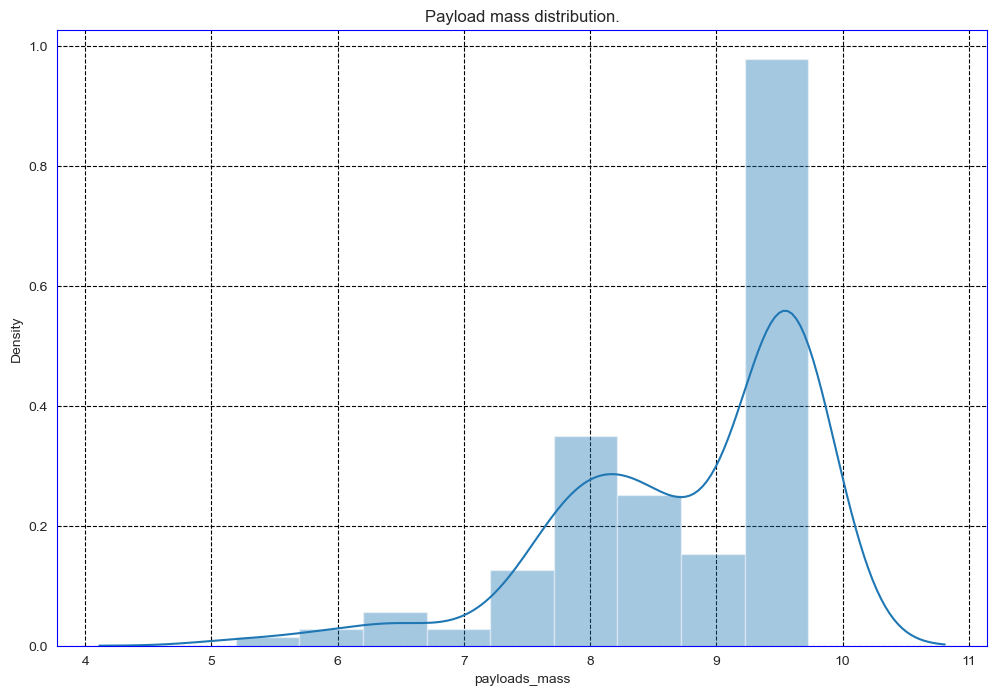

In [82]:
sns.distplot(np.log(raw_df['payloads_mass']))
plt.title("Payload mass distribution.")
plt.show()

The histogram for the price column shows that our dataset is negatively skewed. We can use discretization on this type of data distribution.

- Step 01: Find the total payloads mass range by subtracting the minimum mass from the maximum mass.

In [83]:
# YOUR CODE HERE
mass_range = raw_df['payloads_mass'].max() - raw_df['payloads_mass'].min()

In [84]:
# TEST
assert adler32(str(mass_range).encode()) == 94306658

- Step 02: Calculate the upper and upper bound for payloads

*Hint*: The minimum payloads will be rounded off to floor, while the maximum payloads will be rounded off to ceil.

In [85]:
# YOUR CODE HERE
lower_interval = int(np.floor(raw_df['payloads_mass'].min()))
upper_interval = int(np.ceil(raw_df['payloads_mass'].max()))

In [86]:
# TEST
assert adler32(str(lower_interval).encode()) == 20316314
assert adler32(str(upper_interval).encode()) == 52297997

- Step 3: Set up bins for visualization. We will make **4 bins** (you can understand why we need 4 bins by experimenting with 4 to 10 bins or the equation below). To generate bins, we will begin with the minimum value and then add the bin interval or length to it. To calculate the second interval, add the interval length to the upper limit of the first interval, and so on.

$$
\text{no\_of\_bins} = \dfrac{\max - \min}{h} = \dfrac{\max - \min}{2 * IQR * n^{-1/3}} = \dfrac{\max - \min}{2 * (Q3 - Q2) * n^{-1/3}}
$$

In [87]:
# YOUR CODE HERE
# raise NotImplementedError()
total_bins = 4
interval_size = mass_range / total_bins

print(f"Interval size: {interval_size}")
print(f'Total bins: {total_bins}')

Interval size: 4153.75
Total bins: 4


And you should give a label for each bin such as `bin_no_1`, `bin_no_2`, etc.

In [88]:
# YOUR CODE HERE
bin_no_1 = lower_interval + interval_size
bin_no_2 = bin_no_1 + interval_size
bin_no_3 = bin_no_2 + interval_size
bin_no_4 = bin_no_3 + interval_size
bins = [lower_interval, bin_no_1, bin_no_2, bin_no_3, bin_no_4]
labels = [f'bin_no_{i}' for i in range(1, total_bins + 1)]
for i in range(total_bins):
    print(f"Bin {i + 1}: {bins[i]} - {bins[i + 1]}")

Bin 1: 180 - 4333.75
Bin 2: 4333.75 - 8487.5
Bin 3: 8487.5 - 12641.25
Bin 4: 12641.25 - 16795.0


And maybe you want to use the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [89]:
# YOUR CODE HERE
raw_df['payloads_mass_bins'] = pd.cut(raw_df['payloads_mass'], bins=bins, labels=labels, include_lowest=True)

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

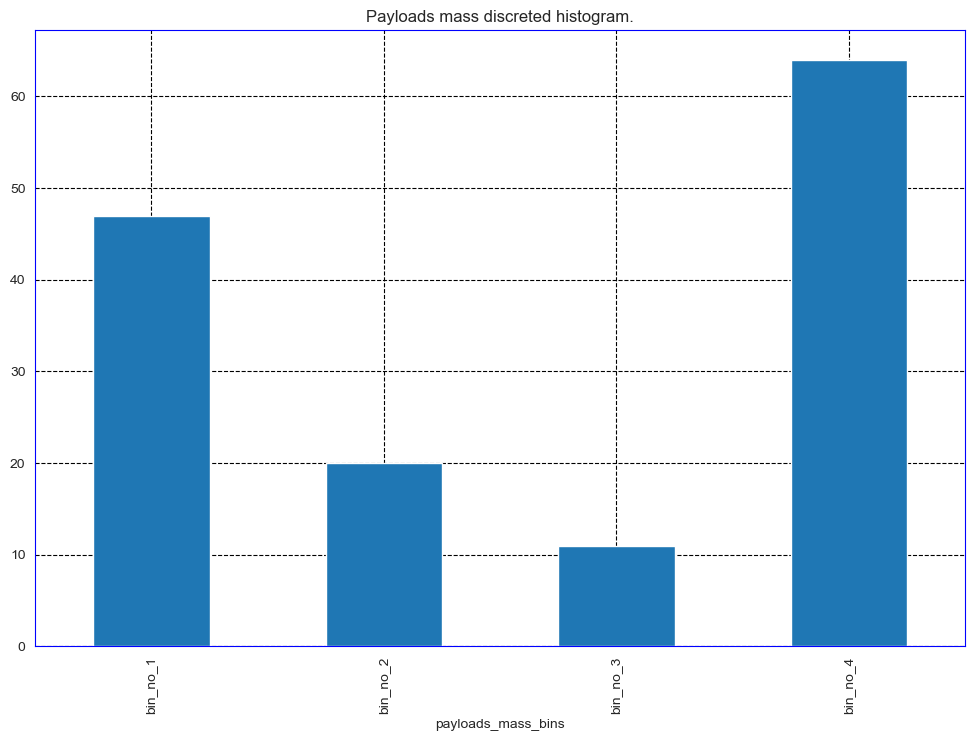

In [90]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.title("Payloads mass discreted histogram.")
plt.show()

**TODO: Describe your observation from chart**

- The chart above is a bar chart showing `payloads_mass` after being discretized into 4 bins. The x-axis represents the bins, while the y-axis represents the number of payloads_mass in each bin.

- In general, it can be seen that the data is unevenly distributed between the bins, mainly in bins 1 and 4 corresponding to 2 ranges of values (from 180 - 4333.75 and 4333.75 to 8487.5)

- The chart above is quite consistent with the histogram of `payloads_mass` before discretization, showing that the data is unevenly distributed and tends to be skewed to the left.

### Equal Frequency Discretization

Equal frequency discretization is a discretization approach in which the bin width is automatically adjusted so that each bin contains exactly the same amount of records and has the same frequency. As a result, the bin intervals will vary. In this part, you'll apply it to the discrete `payloads_mass` column.

- Step 01: To convert a continuous column into equal frequency discretized bins, you maybe want to use the ["qcut()" method](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html).

In [91]:
# YOUR CODE HERE
data, bins = pd.qcut(raw_df['payloads_mass'], q=4, retbins=True)
bins

array([  180.  ,  3401.75,  9600.  , 14760.  , 16795.  ])

- Step 02: Create bin labels

In [92]:
# YOUR CODE HERE
labels = [f"bin_no_{i}" for i in range(1, 5)]

- Step 03: Apply the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [93]:
# YOUR CODE HERE
raw_df['payloads_mass_bins'] = pd.cut(raw_df['payloads_mass'], bins=bins, labels=labels, include_lowest=True)

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

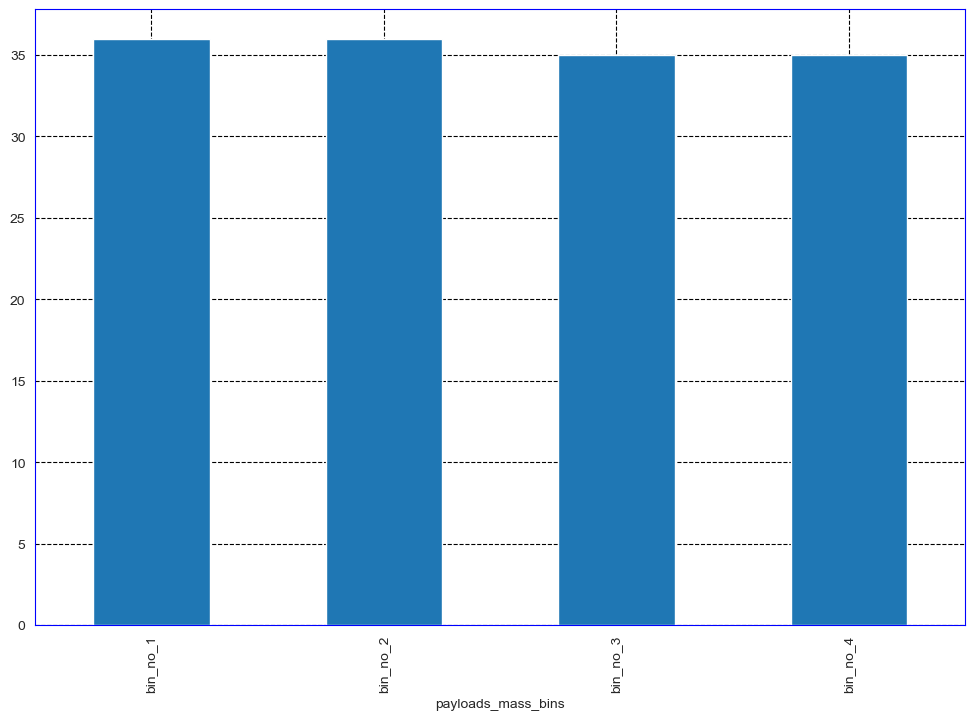

In [94]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.show()

**Bonus points** Study about K-Means Discretization, and Decision Tree Discretization.

- Data discretization is a data preprocessing step that is often used in data mining to reduce the complexity of the data and to make the data easier to understand. It involves the process of converting continuous data attributes into a finite set of intervals and associating each interval with a discrete value. The main goal of data discretization is to reduce the complexity of the data and to make the data easier to understand. 

- There are several different methods for data discretization, as teachers mentioned above:
    - Equal Width Discretization
    - Equal Frequency Discretization
    - K-Means Discretization
    - Decision Tree Discretization

- The two methods that we have used above are Equal Width Discretization and Equal Frequency Discretization which are the most common methods for data discretization. These are unsupervised discretization techniques because they find the interval limits without considering the target.

- K-Means Discretization is a supervised discretization technique that uses the K-Means algorithm to find the interval limits. Discretization with k-means requires one parameter, which is k, the number of clusters or the number of bins. 

- Decision tree methods discretize continuous attributes during the learning process. A decision tree evaluates all possible values of a feature and selects the cut-point that maximizes the class separation, typically using metrics like entropy or Gini impurity. This process is repeated for each node of the initial data separation and for subsequent data splits until a stopping criteria is met. Therefore, decision trees can, by design, find the set of cut-points that partition a variable into intervals with good class coherence. 

- Decision tree needs a target variable to find the best cut-point for each feature so I will use bins from above to apply for decision tree discretization.

[Reference](https://www.blog.trainindata.com/data-discretization-in-machine-learning/)

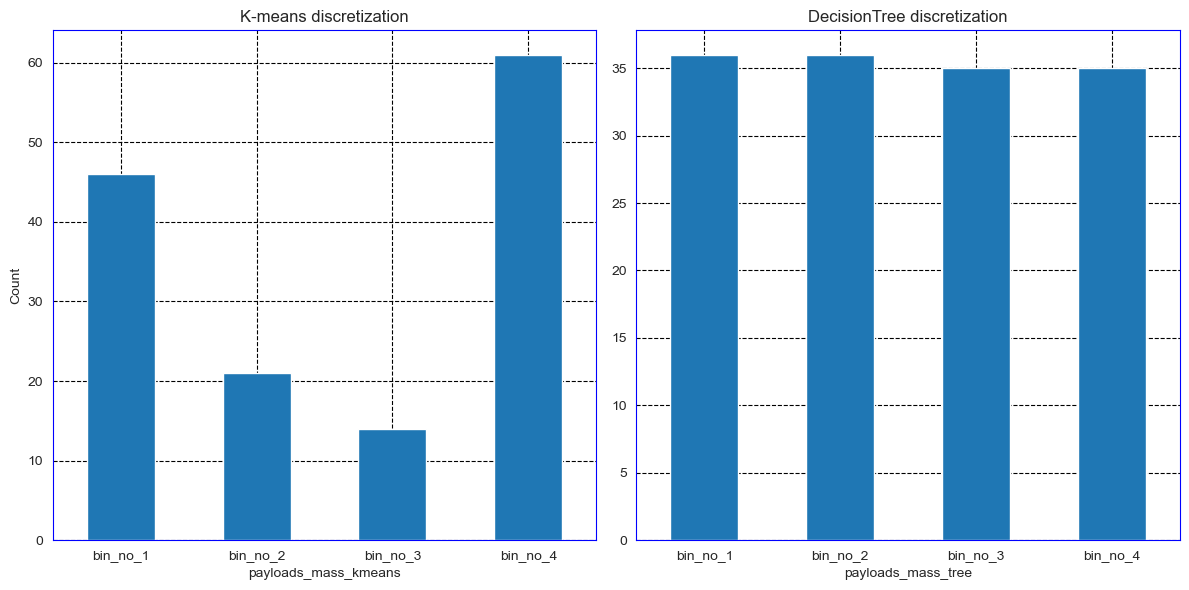

In [95]:
kmeans = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')
raw_df['payloads_mass_kmeans'] = kmeans.fit_transform(raw_df[['payloads_mass']])
raw_df['payloads_mass_tree'] = DecisionTreeClassifier(max_depth=4).fit(raw_df[['payloads_mass']], raw_df['payloads_mass_bins']).predict(raw_df[['payloads_mass']])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
raw_df.groupby('payloads_mass_kmeans')['payloads_mass'].count().plot.bar(ax=ax[0])
raw_df.groupby('payloads_mass_tree')['payloads_mass'].count().plot.bar(ax=ax[1])

ax[0].set_title("K-means discretization")
ax[1].set_title("DecisionTree discretization")
ax[0].set_ylabel("Count")
ax[0].set_xticklabels(labels, rotation=0)
ax[1].set_xticklabels(labels, rotation=0)
plt.tight_layout()
plt.show()
raw_df.drop(columns=['payloads_mass_kmeans', 'payloads_mass_tree'], inplace=True)

According to the chart of the 2 methods KMeans and Decision Tree Discretization, we have some observations:
- KMeans Discretization: With 4 bins, the data is divided into 4 uneven value ranges, mainly focusing on bin 1 and bin 4, similar to Equal Width Discretization.
- Decision Tree Discretization: The result of Decision Tree Discretization is because we have given the target variable model as `payloads_mass_bins` from Equal Frequency Discretization (the adjacent cells above), so the result of Decision Tree Discretization is similar to Equal Frequency Discretization.

In [96]:
# Exclude "bins" for next section
raw_df = raw_df.drop(["payloads_mass_bins"], axis=1)

## Outlier handling techniques (1 pts)

There are some techniques that you can use to handle outliers:
- Totally removing the outliers from the dataset.
- Treating outliers as missing values, and then apply any techniques to filter them.
- Applying discretization techniques to the dataset that will include the outlier along with other data points at the tail.
- Capping and replacing them with maximum and minimum values that can be found via some techniques.

### Outlier Trimming

Outlier trimming is an outlier handling technique that simply removes the outliers beyond a certain threshold value. And the easiest way to determine this threshold value is to use the IQR.

Let’s remove the outliers from the `payloads_mass` column of this dataset.

- Step 01: Using box plot to visualize the outliers.

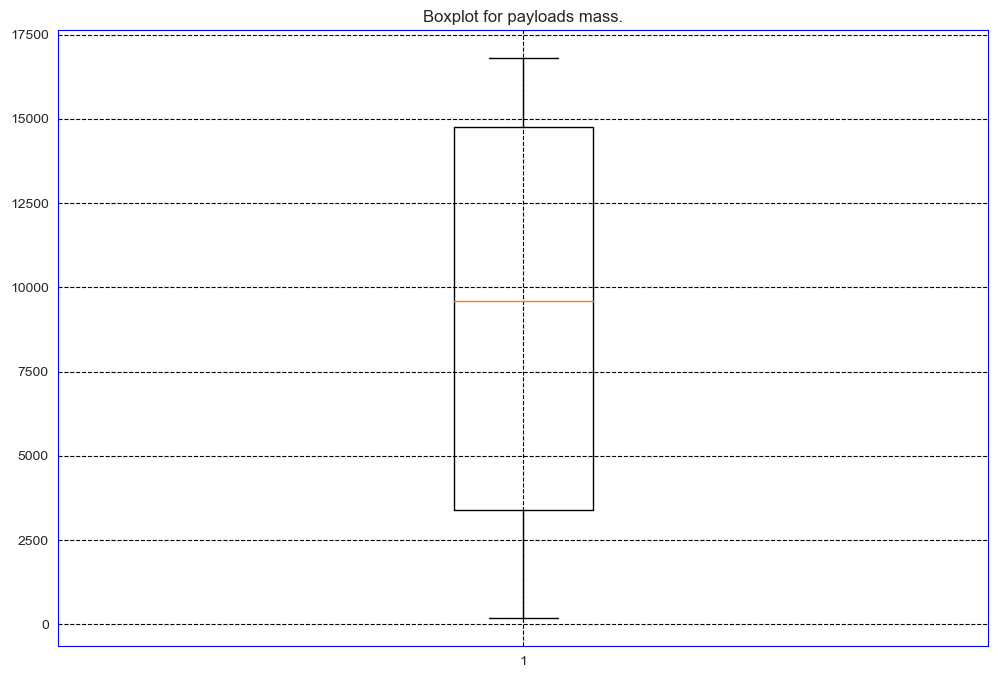

In [97]:
# YOUR CODE HERE
plt.boxplot(raw_df['payloads_mass'])
plt.title("Boxplot for payloads mass.")
plt.show()

Very lucky, we have no outliers. :D

- Step 02: Calculate IQR and determine the lower bound and upper bound for `payloads_mass`

In [98]:
IQR = raw_df["payloads_mass"].quantile(0.75) - raw_df["payloads_mass"].quantile(0.25)

lower_payloads_mass_limit = raw_df["payloads_mass"].quantile(0.25) - (IQR * 1.5)
upper_payloads_mass_limit = raw_df["payloads_mass"].quantile(0.75) + (IQR * 1.5)

print(f"The lower bound for payloads limitation: {lower_payloads_mass_limit}")
print(f"The upper bound for payloads limitation: {upper_payloads_mass_limit}")

The lower bound for payloads limitation: -13635.625
The upper bound for payloads limitation: 31797.375


- Step 03: Construct rule for trimming outliers.

In [99]:
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_payloads_mass_limit,
    True,
    np.where(raw_df["payloads_mass"] < lower_payloads_mass_limit, True, False),
)

- Step 04: Trimming outliers

In [100]:
rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]

raw_df.shape, payloadsmass_outliers.shape

((142, 185), (142,))

TODO: What are the advantages and disadvantages of outlier trimming?

- Advantages:

    - Improved Model Performance: Outlier trimming can improve model performance by reducing the influence of extreme values on the model's fitting process. This can result in more accurate predictions or estimations.

    - Better Data Distribution: Trimming outliers can help in achieving a more normal or Gaussian distribution of the data, which is often an assumption of many statistical models. This can lead to more reliable statistical inferences.

    - Robustness: Outlier trimming can make statistical analyses more robust by reducing the impact of extreme values, making the results less sensitive to outliers.

- Disadvantages:

    - Loss of Information: Trimming outliers may result in the loss of valuable information, especially if the outliers contain important insights or represent genuine variation in the data. This can lead to biased conclusions or interpretations.

    - Subjectivity: Determining which data points constitute outliers and how much to trim can be subjective and arbitrary. Different methods of outlier detection and trimming may lead to different results, impacting the reproducibility and reliability of analyses.

    - Trimming outliers can distort the relationships between variables, particularly in cases where outliers are not due to data entry errors but rather reflect real-world phenomena. Removing these outliers may alter the understanding of the underlying relationships in the data.


### Outlier Capping Using IQR

I am very smart to use IQR to demonstrate the above technique, and for this section, I don't have to demonstrate it again. :)

TODO: Tell me, what is the IQR distance normally used to cap outliers via IQR?

The IQR (Interquartile Range) distance is commonly used to cap outliers by identifying a range that encapsulates the central portion of the data distribution. This range is determined by the difference between the third quartile (Q3) and the first quartile (Q1). Typically, outliers are capped at a distance of 1.5 times the IQR below the first quartile (Q1) and above the third quartile (Q3) of the data distribution. This distance is calculated as:

$$ \text{Lower Bound} = Q1 - 1.5 * IQR $$
$$ \text{Upper Bound} = Q3 + 1.5 * IQR $$

Where:
- Q1 is the first quartile
- Q3 is the third quartile
- IQR is the interquartile range

Any data points below the Lower Bound or above the Upper Bound are considered outliers and are capped at these boundaries. This method helps in identifying extreme values that deviate significantly from the central tendency of the data distribution while still retaining some flexibility to account for natural variability in the data.

### Outlier Capping Using Mean & Standard Deviation

Instead of using the IQR method, the upper and lower thresholds for outliers can be calculated via the mean and standard deviation method.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `mean` + 3 * `sigma`

`lower_bound` = `mean` - 3 * `sigma`

In [101]:
# YOUR CODE HERE
mean = raw_df['payloads_mass'].mean()
sigma = raw_df['payloads_mass'].std()

lower_bound = mean - 3 * sigma
upper_bound = mean + 3 * sigma

- Step 02: Construct rule for trimming outliers.

In [102]:
# YOUR CODE HERE
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_bound,
    True,
    np.where(raw_df["payloads_mass"] < lower_bound, True, False),
)

- Step 03: Trimming outliers

In [103]:
# YOUR CODE HERE
rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]

TODO: What are the advantages and disadvantages of using mean and standard deviation? Tell me, what is the quartile distance normally used to cap outliers via mean and standard deviation? Give your explaination.

**Advantages of Using Mean and Standard Deviation:**

- **Simplicity**: The mean and standard deviation method is straightforward and easy to calculate, making it widely used for outlier identification.
  
- **Flexibility**: This method allows for outlier detection based on the variability of the data distribution, particularly effective when data is normally or approximately normally distributed.
  
- **Interpretability**: Mean reflects the central tendency, while standard deviation measures dispersion, offering valuable insights into data distribution.

**Disadvantages of Using Mean and Standard Deviation:**

- **Sensitivity to Outliers**: Mean and standard deviation are greatly influenced by outliers, potentially biasing estimates.
  
- **Assumption of Normality**: This method assumes data follows a normal distribution, which may not always hold true, impacting accuracy.
  
- **Impact of Skewness**: Skewed or heavy-tailed distributions can distort results, leading to inaccurate outlier identification.

**Quartile Distance (Z-score Method) for Capping Outliers via Mean and Standard Deviation:**

The Z-score method, also known as the quartile distance, utilizes the mean and standard deviation to identify outliers based on the number of standard deviations from the mean. The Z-score formula is:

$$ Z = \frac{(X - \mu)}{\sigma} $$

- **Empirical Rule (68-95-99.7)**:
  - Approximately 68% of data falls within 1 standard deviation of the mean (Z-score between -1 and 1).
  - Approximately 95% falls within 2 standard deviations (Z-score between -2 and 2).
  - Approximately 99.7% falls within 3 standard deviations (Z-score between -3 and 3).

Therefore, the quartile distance normally used to cap outliers via mean and standard deviation is 3 standard deviations from the mean. This distance is calculated as:

$$ \text{Lower Bound} = \mu - 3 * \sigma $$
$$ \text{Upper Bound} = \mu + 3 * \sigma $$

Any data points below the Lower Bound or above the Upper Bound are out of the range of 3 standard deviations (99.7% of the data) and are considered outliers. This method is particularly effective for normally distributed data, where the majority of data falls within 3 standard deviations of the mean.


### Outlier Capping Using Quantiles

Furthermore, the upper and lower thresholds for outliers can be calculated via quantile information. We can use it to find outliers.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `quantile` 90%

`lower_bound` = `quantile` 10%

In [104]:
# YOUR CODE HERE
upper_bound = raw_df['payloads_mass'].quantile(0.9)
lower_bound = raw_df['payloads_mass'].quantile(0.1)

- Step 02: Construct rule for trimming outliers.

In [105]:
# YOUR CODE HERE
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_bound,
    True,
    np.where(raw_df["payloads_mass"] < lower_bound, True, False),
)

- Step 03: Trimming outliers

In [106]:
# YOUR CODE HERE
rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]

TODO: What are the advantages and disadvantages of using Quantiles?

- Advantages of using Quantiles:

    - **Robustness**: Quantiles are robust to outliers and skewed distributions, making them suitable for datasets with non-normal distributions or extreme values

    - **Flexibility**: Quantiles allow for the identification of outliers based on percentiles, providing a customizable approach to outlier detection that can be tailored to specific needs.

    - **Interpretability**: Quantiles offer valuable insights into the spread and variability of the data, providing a clear understanding of the data distribution.

- Disadvantages of using Quantiles:

    - **Dependency on Data Distribution**: Quantiles heavily rely on the distribution of the data, and their effectiveness can vary depending on the dataset's characteristics. In cases where data distribution deviates significantly from normality, quantile-based methods may produce unreliable results.

    - **Complexity**: Calculating quantiles can be complex and computationally intensive, especially for large datasets or non-standard distributions.

    - **Loss of Information**: By focusing solely on percentiles, quantile-based methods may overlook important details and nuances in the data, potentially leading to oversimplified analyses.

    - **Subjectivity in Threshold Selection**: Choosing appropriate quantile thresholds (e.g., 10th and 90th percentiles) can be subjective and may require domain knowledge or trial-and-error, leading to potential inconsistencies across analyses.

## Feature scaling techniques (2 pts)

As you know, in any dataset, there are also many different attributes. And the attributes can have different magnitudes, and statistical information includes variances, standard deviations, mean values, etc. The difference in the scale or magnitude of attributes can actually affect statistical models, such as:
- The dominance of large-scale variables
- Gradient descent algorithm for convergence
- Eclidean distance affects similarity among features.

In this section, I give you some techniques that can be applied in some situations.

### Standardisation

Standardization is the processing of centering the variable at zero and standardizing the data variance to 1. Now, I will you an example for numerical variable in `raw_df` and visualize on `payloads_mass` attributes.

- Step 01: Init

In [107]:
scaler = StandardScaler()

- Step 02: Fitting

In [108]:
scaler.fit(raw_df.drop(["uct_time"], axis=1))

StandardScaler()

- Step 03: Transform data

In [109]:
raw_df_scaled = scaler.transform(raw_df.drop(["uct_time"], axis=1))
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = raw_df.drop(["uct_time"], axis=1).columns)

- Step 04: Test

In [110]:
raw_df_scaled.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Ax-1,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-22 & IROSA,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-8,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-3,launch_name_Crew-4,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_Globalstar FM15,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KPLO,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-85,launch_name_Nilesat-301,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SARah 1,launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-22,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 3-1 (v1.5),launch_name_Starlink 3-2 (v1.5),launch_name_Starlink 3-3 (v1.5),launch_name_Starlink 3-4 (v1.5),launch_name_Starlink 4-1 (v1.5),launch_name_Starlink 4-10 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-12 (v1.5),launch_name_Starlink 4-13 (v1.5),launch_name_Starlink 4-14 (v1.5),launch_name_Starlink 4-15 (v1.5),launch_name_Starlink 4-16 (v1.5),launch_name_Starlink 4-17 (v1.5),launch_name_Starlink 4-18 (v1.5),launch_name_Starlink 4-19 (v1.5),launch_name_Starlink 4-2 (v1.5) & Blue Walker 3,launch_name_Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,launch_name_Starlink 4-21 (v1.5),launch_name_Starlink 4-22 (v1.5),launch_name_Starlink 4-23 (v1.5),launch_name_Starlink 4-25 (v1.5),launch_name_Starlink 4-26 (v1.5),launch_name_Starlink 4-27 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-34 (v1.5),launch_name_Starlink 4-35 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink 4-9 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-15 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-2,launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-8 & SkySat 16-18,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,launch_name_Thaicom 8,launch_name_Transp

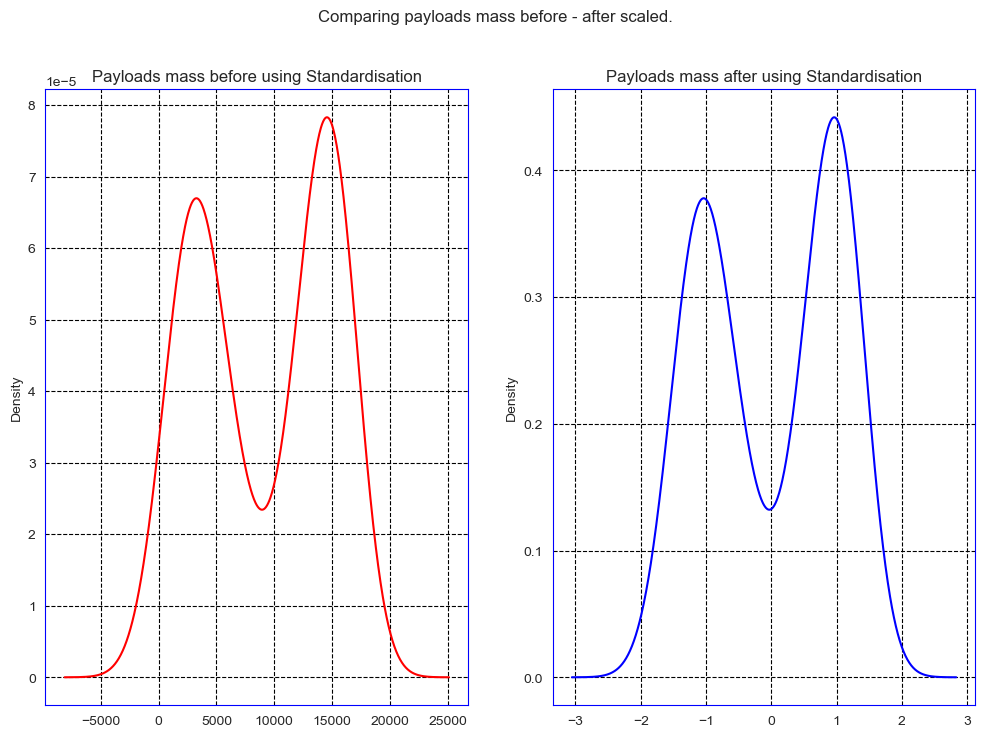

In [111]:
fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Standardisation")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: Describe your observation from chart**

- The data after standardization still retains the shape of the original data, but the range of the standardized data is approximately from -2 to 2 and is centered at 0, while the range of the original data is approximately from 0 to 20000.

- The two peaks of the p.d.f of the original data and the standardized data are still the same, but the two peaks of the p.d.f of the standardized data are close to -1 and 1, corresponding to the standard deviation of the standardized data is 1.

### Min/Max Scaling

Min/max scaling subtracts each value by the minimum value, and then divide the result by the difference of minimum and maximum value in the dataset.

TODO: Use `sckit-learn` for applying min/max scaling to the `payloads_mass` column.

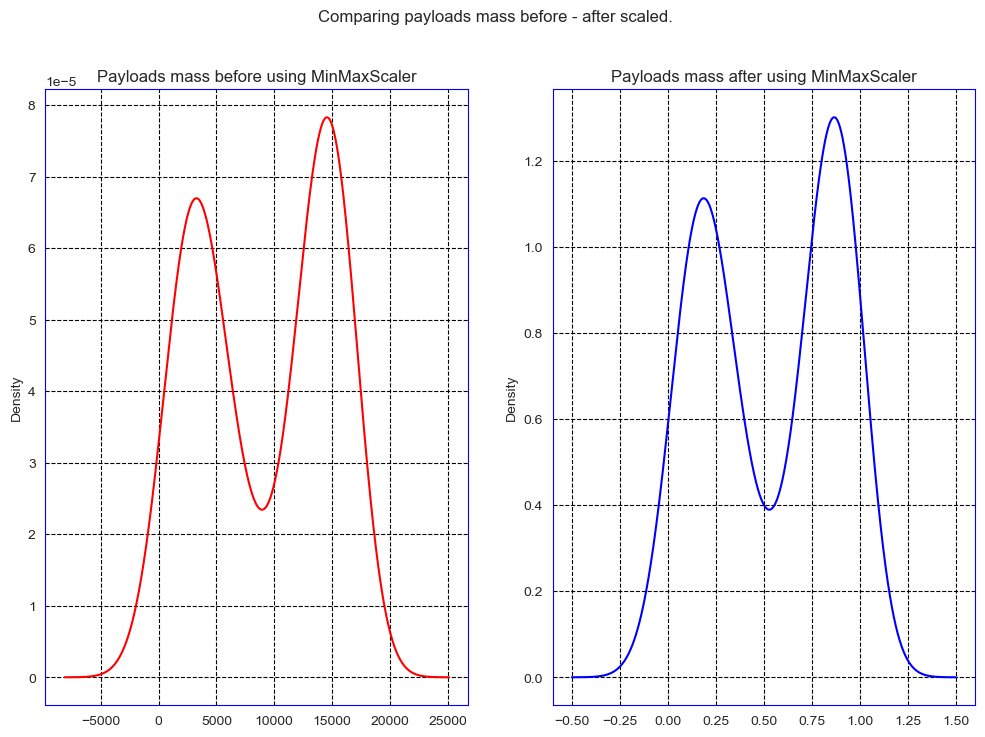

In [112]:
# YOUR CODE HERE
scaler = MinMaxScaler()
scaler.fit(raw_df['payloads_mass'].values.reshape(-1, 1))
raw_df['payloads_mass_minmax'] = scaler.transform(raw_df['payloads_mass'].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using MinMaxScaler")

raw_df["payloads_mass_minmax"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using MinMaxScaler")

fig.suptitle("Comparing payloads mass before - after scaled.")
plt.show()
raw_df.drop(columns=["payloads_mass_minmax"], inplace=True)

**TODO: After visualizing the results, describe your observation from chart**

- The data after min/max scaling still retains the shape of the original data (including the two peaks) but mainly lies in the range from 0 to 1 (as the result of min/max scaling) and is centered at 0.5, while the range of the original data is approximately from 0 to 20000.

### Mean Normalization

Mean normalization is very similar to min/max scaling.

**TODO: Tell me what is the difference between mean normalization and min/ max scaling.**

- Min/max scaling:

$$ x' = \dfrac{x - \min}{\max - \min} $$


- Mean normalization:

$$ x' = \dfrac{x - \text{mean}}{\max - \min} $$


- The difference between mean normalization and min/max scaling is that mean normalization subtracts the **mean value** from each value, and then divide the result by the difference of maximum and minimum value in the dataset, while min/max scaling subtracts each value by the **minimum value**, and then divide the result by the difference of minimum and maximum value in the dataset.

- So, the range of the min/max scaling is from 0 to 1, while the range of the mean normalization is from -1 to 1.


TODO: Use `sckit-learn` for applying mean normalization to the `payloads_mass` column.

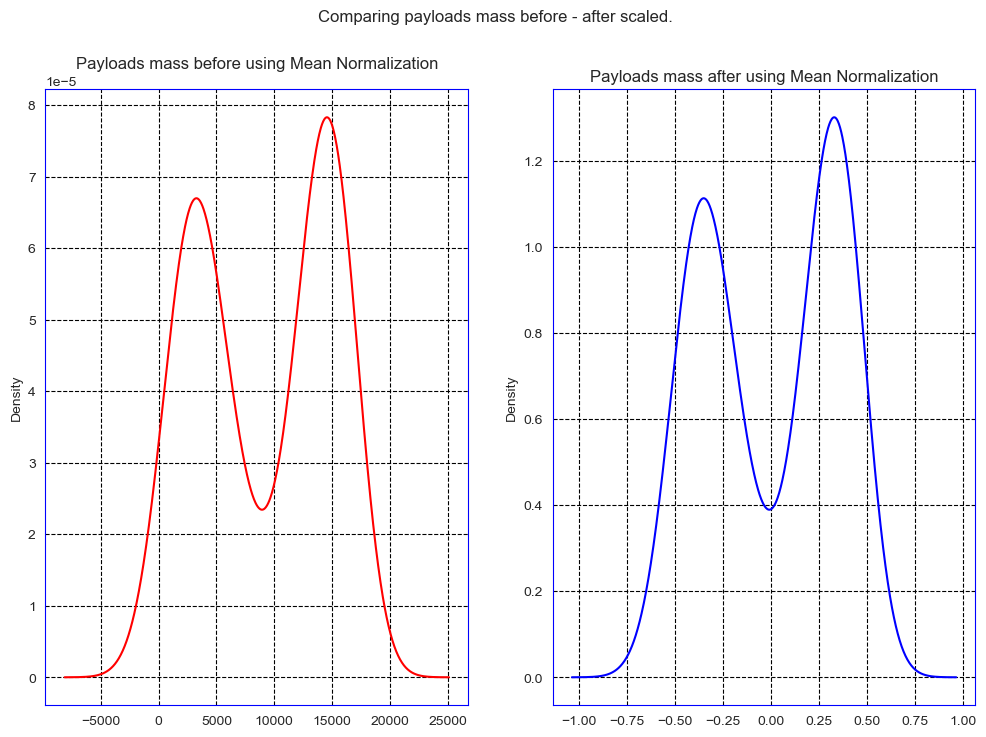

In [113]:
# YOUR CODE HERE
# apply mean normalization
mean_payloads_mass = raw_df['payloads_mass'].mean()
raw_df['payloads_mass_mean_norm'] = (raw_df['payloads_mass'] - mean_payloads_mass)/ (raw_df['payloads_mass'].max() - raw_df['payloads_mass'].min())

fig, axes = plt.subplots(1, 2)
axes[0].set_title("Payloads mass before using Mean Normalization")
raw_df['payloads_mass'].plot(kind="kde", ax=axes[0], color="red")

axes[1].set_title("Payloads mass after using Mean Normalization")
raw_df['payloads_mass_mean_norm'].plot(kind="kde", ax=axes[1], color="blue")

fig.suptitle("Comparing payloads mass before - after scaled.")
plt.show()
raw_df.drop(columns=["payloads_mass_mean_norm"], inplace=True)

**TODO: After visualizing the results, describe your observation from chart**

- The data after mean normalization still retains the shape of the original data (including the two peaks) but mainly lies in the range from -0.5 to 0.5 (as the result of mean normalization) and centered at 0, while the original data lies in the range from 0 to 20000.

### Maximum Absolute Scaling

Maximum absolute scaling is probably the simplest of all the scaling techniques. In maximum absolute scaling, each data point is simply divided by the maximum value.

TODO: Use `sckit-learn` for applying maximum absolute scaling to the `payloads_mass` column.

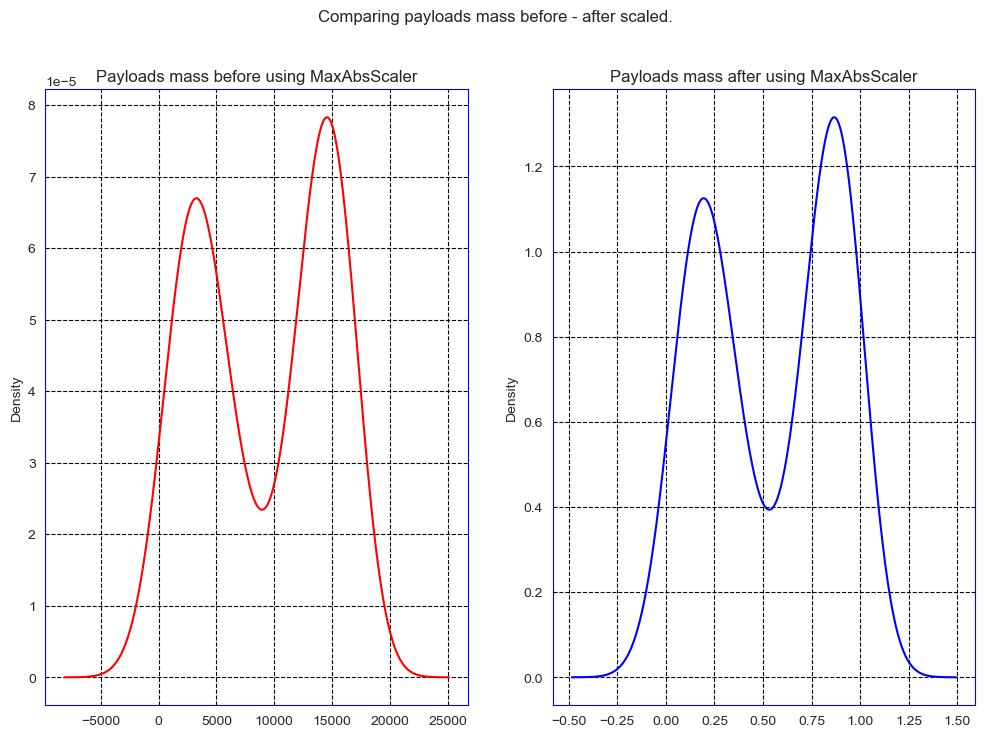

In [114]:
# YOUR CODE HERE
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(raw_df['payloads_mass'].values.reshape(-1, 1))
raw_df['payloads_mass_maxabs'] = scaler.transform(raw_df['payloads_mass'].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2)
axes[0].set_title("Payloads mass before using MaxAbsScaler")
raw_df['payloads_mass'].plot(kind="kde", ax=axes[0], color="red")

axes[1].set_title("Payloads mass after using MaxAbsScaler")
raw_df['payloads_mass_maxabs'].plot(kind="kde", ax=axes[1], color="blue")

fig.suptitle("Comparing payloads mass before - after scaled.")
plt.show()
raw_df.drop(columns=["payloads_mass_maxabs"], inplace=True)

**TODO: After visualizing the results, describe your observation from chart**

- The data after maximum absolute scaling still retains the shape of the original data (including the two peaks) but mainly lies in the range from 0 to 1 (as the result of maximum absolute scaling), while the range of the original data is approximately from 0 to 20000.

### Median and Quantile Scaling

In median and quantile scaling, the mean of the dataset is subtracted from all the data points, and the result is divided by the difference between the first quartile and the 3rd quartile.

TODO: Use `sckit-learn` for applying median and quantile scaling to the `payloads_mass` column.

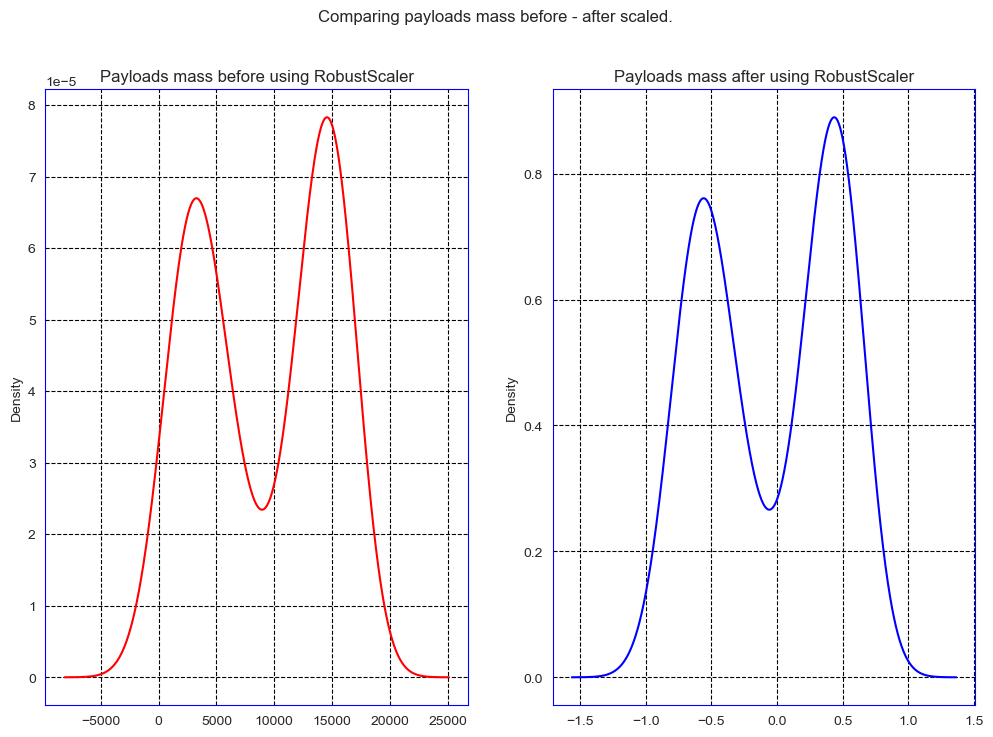

In [115]:
# YOUR CODE HERE
scaler = RobustScaler()
scaler.fit(raw_df['payloads_mass'].values.reshape(-1, 1))
raw_df['payloads_mass_robust'] = scaler.transform(raw_df['payloads_mass'].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2)
axes[0].set_title("Payloads mass before using RobustScaler")
raw_df['payloads_mass'].plot(kind="kde", ax=axes[0], color="red")

axes[1].set_title("Payloads mass after using RobustScaler")
raw_df['payloads_mass_robust'].plot(kind="kde", ax=axes[1], color="blue")

fig.suptitle("Comparing payloads mass before - after scaled.")
plt.show()
raw_df.drop(columns=["payloads_mass_robust"], inplace=True)

**TODO: After visualizing the results, describe your observation from chart**

- The data after median and quantile scaling still retains the shape of the original data (including the two peaks) but mainly lies in the range from -1 to 1 and is centered at 0, while the range of the original data is approximately from 0 to 20000.

### Vector Unit Length Scaling

In unit length scaling, a new feature vector is created by dividing feature vector by the Manhattan distance (l1 norm), or by the Euclidian distance (l2 norm).

TODO: Use `sckit-learn` for applying vector unit length scaling to the `payloads_mass` column.

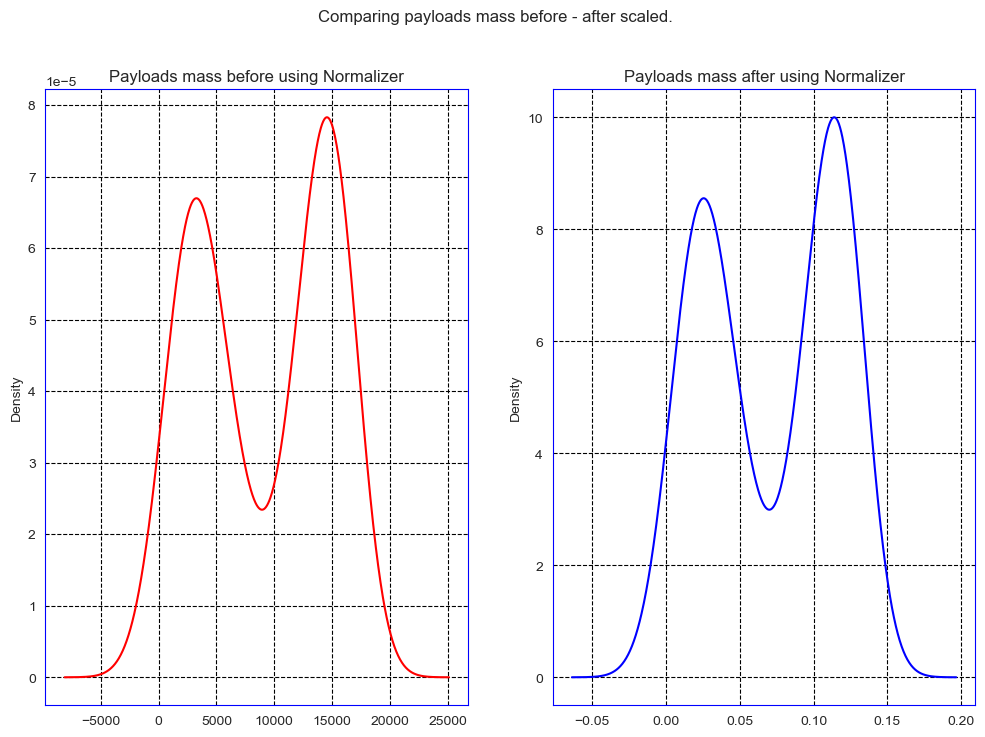

In [116]:
# YOUR CODE HERE
# vector unit scaling
scaler = Normalizer(norm='l2')
scaler.fit(raw_df['payloads_mass'].values.reshape(1, -1))
raw_df_scaled = scaler.transform(raw_df['payloads_mass'].values.reshape(1, -1)).T
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = ['payloads_mass'])

fig, axes = plt.subplots(1, 2)
axes[0].set_title("Payloads mass before using Normalizer")
raw_df['payloads_mass'].plot(kind="kde", ax=axes[0], color="red")

axes[1].set_title("Payloads mass after using Normalizer")
raw_df_scaled['payloads_mass'].plot(kind="kde", ax=axes[1], color="blue")

fig.suptitle("Comparing payloads mass before - after scaled.")
plt.show()

**TODO: After visualizing the results, describe your observation from chart**

- The data after vector unit length scaling still retains the shape of the original data (including the two peaks) but mainly lies in the range from 0 to 0.15 (as the result of vector unit length scaling), while the range of the original data is approximately from 0 to 20000.

### When and where to apply these normalization techniques?

**Question**: After these a bund of normalization techniques, tell me when and where to apply these normalization techniques?

- Standardization: This technique is useful when the distribution of the feature is Gaussian (normal distribution). It centers the feature's mean at 0 and scales it to have a standard deviation of 1. It's particularly effective for algorithms that assume zero-centered data, such as linear regression, logistic regression, and support vector machines (SVMs).

- Min-Max Scaling: Use min-max scaling when we know the distribution of the data, or when we want to bound our features within a specific range. It scales the feature to a fixed range (typically 0 to 1), making it suitable for algorithms like neural networks and algorithms that use distance metrics like K-means clustering.

- Mean Normalization: Mean normalization is beneficial when the distribution of the feature is not Gaussian and we don't have prior knowledge about the range of the data. It scales the feature so that the mean is centered at 0 and the values fall within a range of -1 to 1. It's commonly used in collaborative filtering and recommendation systems.

- Max-Abs Scaling: Max-abs scaling is useful when we want to scale the feature so that the maximum absolute value of each feature is 1. It doesn't shift or center the data, preserving the sparsity and sign of the original data. It's often used in feature selection and sparse data scenarios.

- Median and Quantile Scaling: This technique is suitable when our data contains outliers and we want to robustly scale the features. It scales the features based on their median and quartile ranges, making it less sensitive to outliers compared to mean-based methods. It's useful in regression tasks where the target variable is sensitive to outliers.

- Vector Unit Scaling: Vector unit scaling is used when we want to scale each feature vector (sample) to have a unit norm (length). It's commonly applied in text classification, document clustering, and any scenario where feature vectors represent documents or texts.

End of your lab 01.